In [1]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


In [2]:
import pandas as pd
df = pd.read_csv('./Data/ad_350.csv')
print(df.shape)
df.head()

(350, 10)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,Nondemented,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,Demented,1,75,12,3.0,23.0,0.5,1678.290000,0.736336,1.045710
3,Demented,1,76,12,3.0,28.0,0.5,1737.620000,0.713402,1.010000
4,Demented,1,80,12,3.0,22.0,0.5,1697.911134,0.701236,1.033623


In [4]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [3]:
data = df.sample(frac=0.90)
data_unseen = df.drop(data.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')

Data for model: (315, 10),
Data for unseen predictions: (35, 10)


# Pycaret - Create Models

Models will be selected based on:
- Performance: Accuracy, Precision and F1
- Time-efficient

In [4]:
from pycaret.classification import  *

In [5]:
s = setup(data=df, target='Group')

,Description,Value
0,Session id,1477
1,Target,Group
2,Target type,Binary
3,Target mapping,"Demented: 0, Nondemented: 1"
4,Original data shape,"(350, 10)"
5,Transformed data shape,"(350, 10)"
6,Transformed train set shape,"(244, 10)"
7,Transformed test set shape,"(106, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
models()

In [8]:
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9878,0.9987,0.9795,1.0000,0.9892,0.9754,0.9769,6.2450
et,Extra Trees Classifier,0.9878,1.0000,0.9795,1.0000,0.9892,0.9754,0.9769,4.3760
xgboost,Extreme Gradient Boosting,0.9878,0.9993,0.9795,1.0000,0.9892,0.9754,0.9769,3.8770
catboost,CatBoost Classifier,0.9878,0.9960,0.9795,1.0000,0.9892,0.9754,0.9769,5.0370
nb,Naive Bayes,0.9837,0.9993,0.9724,1.0000,0.9854,0.9670,0.9687,4.2800
lda,Linear Discriminant Analysis,0.9837,0.9959,0.9795,0.9933,0.9857,0.9667,0.9685,4.9680
lightgbm,Light Gradient Boosting Machine,0.9798,0.9920,0.9795,0.9875,0.9825,0.9589,0.9615,3.9580
qda,Quadratic Discriminant Analysis,0.9797,0.9980,0.9652,1.0000,0.9817,0.9589,0.9610,5.9290
gbc,Gradient Boosting Classifier,0.9795,0.9946,0.9795,0.9867,0.9823,0.9580,0.9602,4.1320
lr,Logistic Regression,0.9758,0.9987,0.9795,0.9808,0.9790,0.9507,0.9536,5.3660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=210, verbose=0, warm_start=False)

In [6]:
xgb = create_model('xgboost')
t_xgb = tune_model(xgb)
f_xgb = finalize_model(t_xgb)
f_xgb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9667,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9600,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV',
                                             'ASF'],
                                    transformer=SimpleImputer(add_indicator=F...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='binary:logistic', predictor=None, ...))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

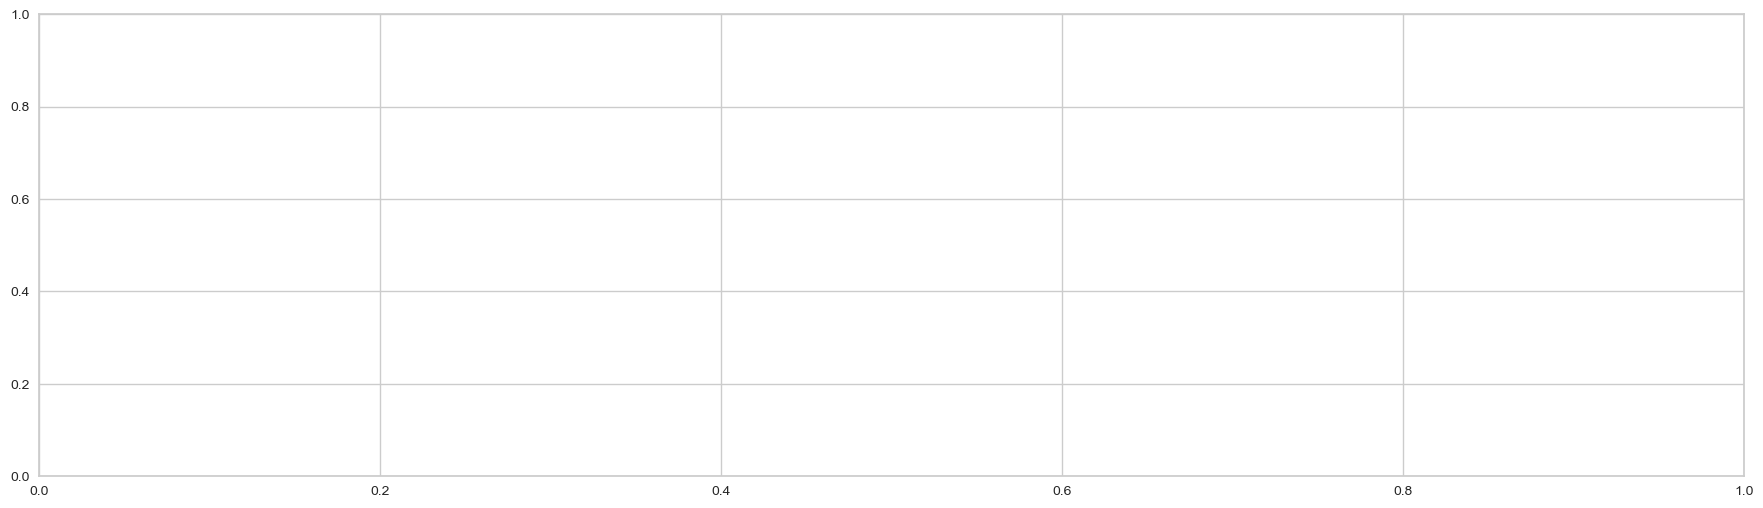

In [21]:
evaluate_model(f_xgb)

In [34]:
lgbm = create_model('lightgbm')
t_lgbm = tune_model(lgbm)
f_lgbm = finalize_model(t_lgbm)
f_lgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9867,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,0.9929,0.9286,0.9286,0.9286,0.8286,0.8286


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9500,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV',
                                             'ASF'],
                                    transformer=SimpleImputer(add_indicator=F...
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=61,
                                min_child_weight=0.001, min_split_gain=0.1,
                                n_estimators=30, n_jobs=-1, num_leaves=100,
                                objective=None, random_state=1477,
                                reg_alpha=0.2, reg_lambda=0.4, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

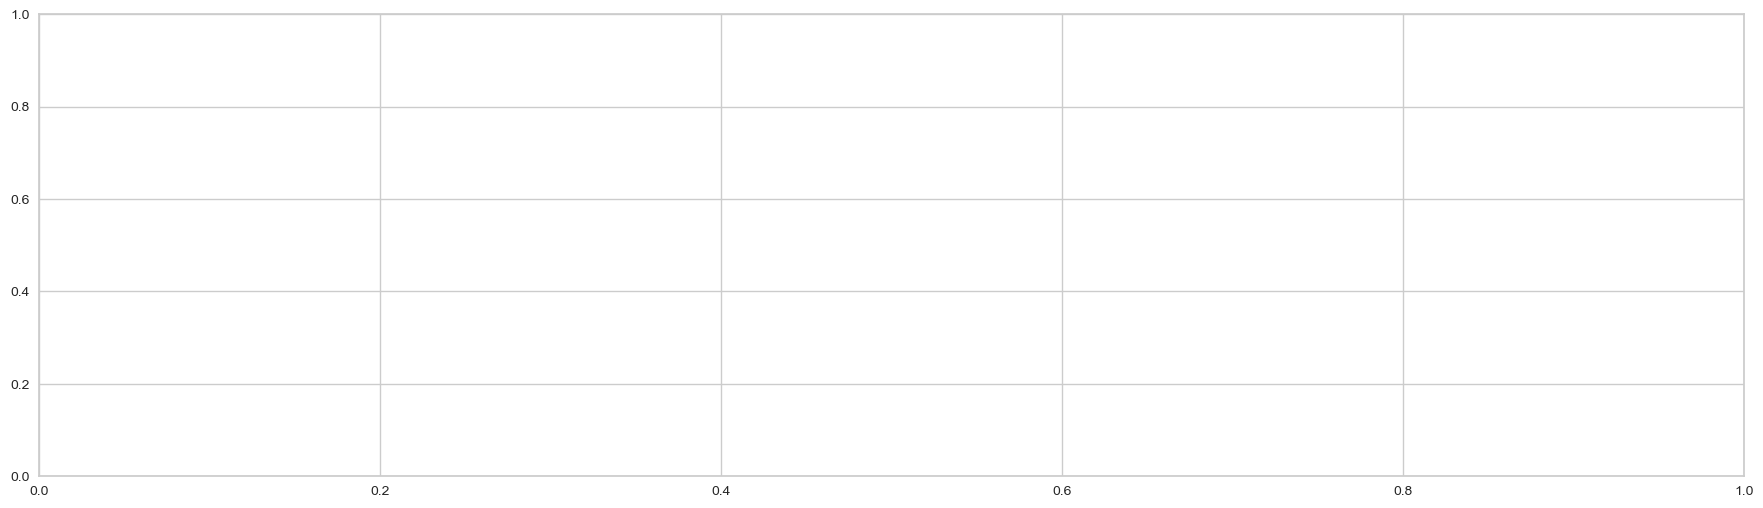

In [22]:
evaluate_model(f_lgbm)

In [9]:
et = create_model('et')
t_et = tune_model(et)
f_et = finalize_model(t_et)
f_et

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9633,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9633,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV',
                                             'ASF'],
                                    transformer=SimpleImputer(add_indicator=F...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=1477,
                                      verbose=0, warm_start=False))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

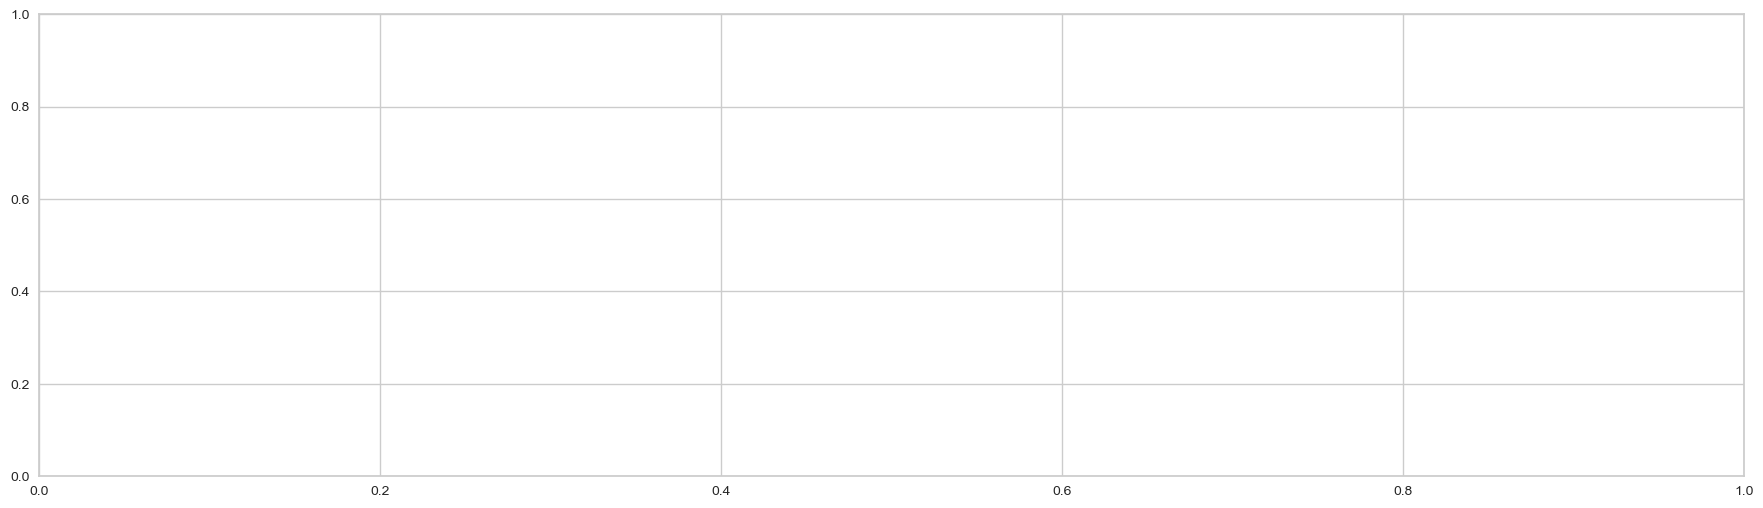

In [23]:
evaluate_model(et)

In [10]:
rf = create_model('rf')
t_rf = tune_model(rf)
f_rf = finalize_model(t_rf)
f_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9467,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.9667,0.9333,1.0000,0.9655,0.9180,0.9211
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV',
                                             'ASF'],
                                    transformer=SimpleImputer(add_indicator=F...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=1477,
                                        verbose=0, warm_start=False))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

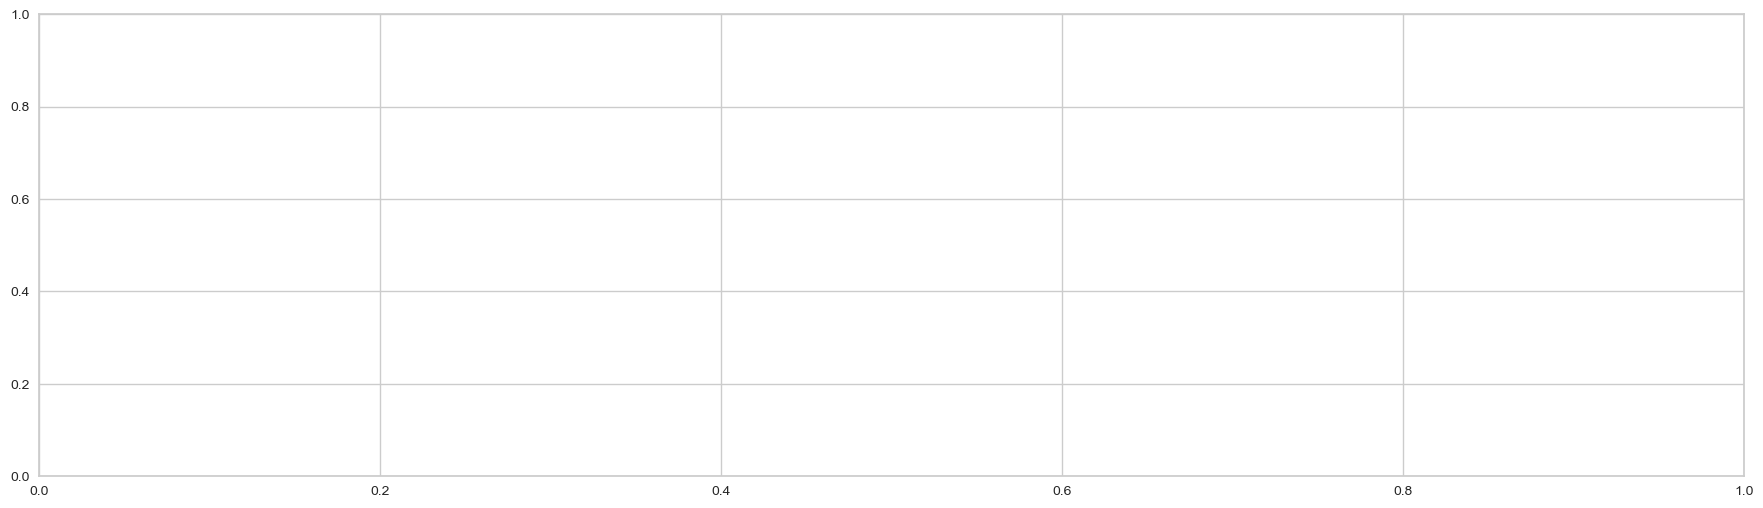

In [24]:
evaluate_model(rf)

# Yellowbricks - Compare models

In [14]:
X = df.drop(columns=['Group'], axis=1)
y = df['Group']

In [15]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.30, shuffle=True)

In [26]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
#from sklearn.svm import LinearSVC, NuSVC, SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = [
    XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None,random_state=1477),
    
    ExtraTreesClassifier(n_jobs=-1, random_state=1477),
    
    RandomForestClassifier(n_jobs=-1, random_state=1477),
    
    LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
               learning_rate=0.15, min_child_samples=61, min_split_gain=0.1,
               n_estimators=30, num_leaves=100, random_state=1477,
               reg_alpha=0.2, reg_lambda=0.4)
]

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        #('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)
    
    f1 = f1_score(expected, predicted)
    acc = accuracy_score(expected, predicted) #  average='weighted'
    prec = precision_score(expected, predicted,average='weighted',zero_division=True)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f'{estimator.__class__.__name__}:')
    print(f'F1_score: {f1*100:.2f}%')
    print(f'ACC : {acc*100:.2f}%')
    print(f'Prec: {prec*100:,.2f}%')

for model in models:
    score_model(X, y, model)

XGBClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
ExtraTreesClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
RandomForestClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LGBMClassifier:
F1_score: 99.26%
ACC : 99.14%
Prec: 99.16%


## Test again unseen data

In [30]:
print(data_unseen.shape)
data_unseen.head()

(35, 10)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
4,Demented,1,80,12,3.0,22.0,0.5,1697.911134,0.701236,1.033623
17,Demented,0,66,12,3.0,30.0,0.5,1446.660000,0.768708,1.213140
22,Nondemented,0,81,12,4.0,30.0,0.0,1229.720000,0.715019,1.427160
38,Nondemented,0,64,16,3.0,29.0,0.0,1316.234534,0.796214,1.333349
48,Demented,1,66,18,2.0,21.0,1.0,1562.050000,0.717241,1.123530


In [32]:
unseen_et = predict_model(f_et, data=data_unseen)
unseen_et

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,prediction_label,prediction_score
4,1,80,12,3.0,22.0,0.5,1697.911133,0.701236,1.033623,Demented,Demented,1.0
17,0,66,12,3.0,30.0,0.5,1446.660034,0.768708,1.213140,Demented,Demented,1.0
22,0,81,12,4.0,30.0,0.0,1229.719971,0.715019,1.427160,Nondemented,Nondemented,1.0
38,0,64,16,3.0,29.0,0.0,1316.234497,0.796214,1.333349,Nondemented,Nondemented,1.0
48,1,66,18,2.0,21.0,1.0,1562.050049,0.717241,1.123530,Demented,Demented,1.0
53,0,86,12,3.0,30.0,0.0,1430.219971,0.718065,1.227080,Nondemented,Nondemented,1.0
56,0,79,16,1.0,29.0,0.0,1466.010010,0.703277,1.197130,Nondemented,Nondemented,1.0
59,0,84,16,1.0,30.0,0.0,1452.666626,0.684491,1.208123,Nondemented,Nondemented,1.0
65,0,75,13,4.0,29.0,0.0,1349.262085,0.778263,1.300711,Nondemented,Nondemented,1.0
80,1,68,14,4.0,21.0,1.0,1332.880005,0.685007,1.316700,Demented,Demented,1.0


In [33]:
unseen_rf = predict_model(f_rf, data=data_unseen)
unseen_rf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,prediction_label,prediction_score
4,1,80,12,3.0,22.0,0.5,1697.911133,0.701236,1.033623,Demented,Demented,0.97
17,0,66,12,3.0,30.0,0.5,1446.660034,0.768708,1.213140,Demented,Demented,0.90
22,0,81,12,4.0,30.0,0.0,1229.719971,0.715019,1.427160,Nondemented,Nondemented,0.99
38,0,64,16,3.0,29.0,0.0,1316.234497,0.796214,1.333349,Nondemented,Nondemented,1.00
48,1,66,18,2.0,21.0,1.0,1562.050049,0.717241,1.123530,Demented,Demented,1.00
53,0,86,12,3.0,30.0,0.0,1430.219971,0.718065,1.227080,Nondemented,Nondemented,0.99
56,0,79,16,1.0,29.0,0.0,1466.010010,0.703277,1.197130,Nondemented,Nondemented,1.00
59,0,84,16,1.0,30.0,0.0,1452.666626,0.684491,1.208123,Nondemented,Nondemented,1.00
65,0,75,13,4.0,29.0,0.0,1349.262085,0.778263,1.300711,Nondemented,Nondemented,0.99
80,1,68,14,4.0,21.0,1.0,1332.880005,0.685007,1.316700,Demented,Demented,1.00


In [35]:
unseen_lgbm = predict_model(f_lgbm, data=data_unseen)
unseen_lgbm

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,0,0,0,1.0000,1.0000


,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,prediction_label,prediction_score
4,1,80,12,3.0,22.0,0.5,1697.911133,0.701236,1.033623,Demented,Demented,0.9780
17,0,66,12,3.0,30.0,0.5,1446.660034,0.768708,1.213140,Demented,Demented,0.9404
22,0,81,12,4.0,30.0,0.0,1229.719971,0.715019,1.427160,Nondemented,Nondemented,0.9908
38,0,64,16,3.0,29.0,0.0,1316.234497,0.796214,1.333349,Nondemented,Nondemented,0.9900
48,1,66,18,2.0,21.0,1.0,1562.050049,0.717241,1.123530,Demented,Demented,0.9794
53,0,86,12,3.0,30.0,0.0,1430.219971,0.718065,1.227080,Nondemented,Nondemented,0.9903
56,0,79,16,1.0,29.0,0.0,1466.010010,0.703277,1.197130,Nondemented,Nondemented,0.9877
59,0,84,16,1.0,30.0,0.0,1452.666626,0.684491,1.208123,Nondemented,Nondemented,0.9909
65,0,75,13,4.0,29.0,0.0,1349.262085,0.778263,1.300711,Nondemented,Nondemented,0.9894
80,1,68,14,4.0,21.0,1.0,1332.880005,0.685007,1.316700,Demented,Demented,0.9842


In [36]:
unseen_xgb = predict_model(f_xgb, data=data_unseen)
unseen_xgb

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,0,0,0,1.0000,1.0000


,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,prediction_label,prediction_score
4,1,80,12,3.0,22.0,0.5,1697.911133,0.701236,1.033623,Demented,Demented,0.9975
17,0,66,12,3.0,30.0,0.5,1446.660034,0.768708,1.213140,Demented,Demented,0.9244
22,0,81,12,4.0,30.0,0.0,1229.719971,0.715019,1.427160,Nondemented,Nondemented,0.9985
38,0,64,16,3.0,29.0,0.0,1316.234497,0.796214,1.333349,Nondemented,Nondemented,0.9967
48,1,66,18,2.0,21.0,1.0,1562.050049,0.717241,1.123530,Demented,Demented,0.9985
53,0,86,12,3.0,30.0,0.0,1430.219971,0.718065,1.227080,Nondemented,Nondemented,0.9980
56,0,79,16,1.0,29.0,0.0,1466.010010,0.703277,1.197130,Nondemented,Nondemented,0.9841
59,0,84,16,1.0,30.0,0.0,1452.666626,0.684491,1.208123,Nondemented,Nondemented,0.9956
65,0,75,13,4.0,29.0,0.0,1349.262085,0.778263,1.300711,Nondemented,Nondemented,0.9985
80,1,68,14,4.0,21.0,1.0,1332.880005,0.685007,1.316700,Demented,Demented,0.9990
